## Цели практической работы

* Изучить и предобработать данные в задаче оттока.

* Научиться применять для решения задачи решающие деревья и оценивать результаты модели.

## Что входит в практическую работу

*  Загрузка и предобработка данных.
*  Применение и настройка линейных моделей.
*  Применение и настройка решающего дерева.
*  Сравнение моделей.
*  Оценка важности признаков.

## Что оценивается

Выполнены все задания ноутбука (заполнены пустые ячейки, даны ответы на вопросы).

## Что нужно сделать
Решите задачу классификации оттоковых клиентов телекома: для каждого клиента необходимо определить, перестанет он пользоваться услугами оператора в ближайшее время или нет.

In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("telecom_churn.csv")
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


Сделайте первичную обработку данных:

1. Выбросите колонку State.

2. Колонки International plan и Voice mail plan закодируйте следующим образом: Yes замените на 1, а No на 0.

3. Переведите целевую переменную (Churn) в числа: True в 1, а False в 0.

In [21]:
df = df.drop("State", axis=1)

rework_cols = ["International plan", "Voice mail plan", "Churn"]

le = LabelEncoder()
for i in rework_cols:
    df[i] = le.fit_transform(df[i])

Выведите на экран первые строки изменённой таблицы, чтобы проверить, что все преобразования сработали.

In [25]:
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Создайте матрицу объект-признак X и вектор с целевой переменной (Churn) y.

In [27]:
X = df.drop("Churn", axis=1)
y = df.Churn

Проверьте баланс классов. Является ли выборка сбалансированной?

In [33]:
print(y.value_counts()) # целевая не сбалансированная

Churn
0    2850
1     483
Name: count, dtype: int64


Разбейте данные на тренировочную и тестовую части, размер тестовой части — 30%.

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Для линейных моделей очень важно масштабирование признаков. Поэтому отмасштабируйте признаки при помощи [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), обучив метод на тренировочных данных и применив его и к трейну, и к тесту.

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scaler.fit_transform(X_test[X_test.columns])

После масштабирования признаков X_train и X_test перестали быть объектами типа pd.DataFrame, это неудобно. Приведите их снова к pd.DataFrame.

In [46]:
X_train.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
2016,-0.511937,1.740454,-0.324289,-0.612192,-0.585483,0.410716,0.873749,0.410877,1.167102,-1.646317,1.167733,-0.456961,0.615443,-0.458282,-0.373682,0.226639,-0.379643,1.073319
1362,-0.939002,1.740454,-0.324289,-0.612192,-0.585483,-0.864713,1.074874,-0.865095,-2.639021,-1.895351,-2.637901,-0.790790,1.075039,-0.789925,-0.122835,-0.997316,-0.127479,1.073319
2670,0.392435,1.740454,-0.324289,1.633475,0.289180,0.752053,0.370935,0.752000,-0.984185,0.893834,-0.983076,-0.425542,-1.018675,-0.423373,-0.445353,0.634624,-0.446002,0.323378
2210,-0.738030,-0.515843,-0.324289,-0.612192,-0.585483,1.814605,0.471498,1.814230,-0.211928,-1.646317,-0.211288,1.070799,-0.814411,1.069020,0.522200,1.042609,0.522840,-1.176504
1846,0.492921,1.740454,-0.324289,1.633475,2.548723,-0.038896,0.823467,-0.039276,-0.509404,-1.496896,-0.510269,-0.773117,0.870774,-0.772470,0.450529,-0.181346,0.456481,-0.426563


In [48]:
X_test.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
438,0.259698,1.670353,-0.335182,-0.632898,-0.606595,-0.445110,-0.341938,-0.445175,2.561623,0.293929,2.561418,-0.240205,1.153602,-0.241616,1.172579,-0.629033,1.178729,-0.431655
2674,-0.896303,-0.541665,-0.335182,-0.632898,-0.606595,-1.289176,0.830588,-1.288918,0.323576,1.214855,0.323785,-0.260318,2.075664,-0.259494,0.921990,0.579871,0.926765,-1.217912
1345,-0.117259,-0.541665,-0.335182,-0.632898,-0.606595,-3.295441,-4.885475,-3.295512,-0.819173,1.521831,-0.818292,-0.688735,-0.639296,-0.688564,-1.225919,-1.434968,-1.221563,1.927116
1957,1.114133,-0.704656,-0.335182,-0.632898,-0.606595,0.617788,-1.025911,0.618158,0.060625,-0.473510,0.060944,-0.907972,0.641345,-0.907568,-0.008771,-1.032000,-0.014786,-0.431655
2148,-0.167520,-0.704656,-0.335182,-0.632898,-0.606595,-0.647391,0.097759,-0.647457,0.467902,-1.394436,0.467998,0.530140,-0.485619,0.531604,-0.080368,0.982838,-0.081093,-0.431655


Обучите на тренировочных данных с параметрами по умолчанию:

1) логистическую регрессию;

2) метод опорных векторов (с kernel='linear').

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

lr = LogisticRegression()
lr.fit(X_train, y_train)

svc = SVC(kernel="linear", probability=True)
svc.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

С помощью обученных моделей сделайте предсказание на тестовых данных. Вычислите значение метрики roc-auc на тесте. 

Не забудьте, что для корректного вычисления roc-auc необходимо предсказывать не сами классы, а их вероятности (чтобы SVC мог это сделать, при объявлении модели поставьте probability=True).

In [62]:
from sklearn.metrics import roc_auc_score

y_pred_lr = lr.predict(X_test)
y_pred_svc = svc.predict(X_test)

roc_lr = roc_auc_score(y_test, y_pred_lr)
roc_svc = roc_auc_score(y_test, y_pred_svc)
print(roc_lr, roc_svc)

0.596718917022301 0.5


Теперь обучите решающее дерево с параметрами по умолчанию на тренировочных данных, сделайте предсказание на тесте и вычислите на тесте roc-auc.

In [66]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)
roc_tree = roc_auc_score(y_test, y_pred_tree)
print(roc_tree)

0.8432081337565586


Нужно ли масшабировать признаки для обучения решающего дерева? Проверьте это, заново разбив данные на тренировочную и тестовую части (назовите новые полученные объекты новыми названиями), и проведите обучение, предсказание и оценку метрики до масштабирования и после.

In [70]:
X_train_nPRoc, X_test_nPRoc, y_train_nPRoc, y_test_nPRoc = train_test_split(X, y, test_size=0.3, random_state=42)

tree2 = DecisionTreeClassifier()
tree2.fit(X_train_nPRoc, y_train_nPRoc)

y_pred_tree2 = tree2.predict(X_test_nPRoc)
roc_tree2 = roc_auc_score(y_test_nPRoc, y_pred_tree2)
print(roc_tree2)

0.8397116302600549


Какой вывод про масштабирование признаков для обучения дерева можно сделать?

- Масштабирование признаков не влияет на качество работы дерева.
    - Дерево не использует расстояния между объектами

Теперь ваша цель — максимально улучшить модели. Для этого:

1) у линейных моделей подберите гиперпараметр С (переберите 20 значений C в диапазоне от 0.1 до 10 с равным шагом);

2) у решающего дерева подберите max_depth (переберите глубину от 1 до 10 с шагом 1) и criterion — gini или entropy (см. [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)).

Для подбора параметров используйте [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) с пятью фолдами и метрикой roc-auc или обычные циклы.

Подбор параметров осуществляется только по тренировочным данным!

После подбора гиперпараметров обучите модели с найденными гиперпараметрами на тренировочных данных, сделайте предсказания на тесте и оцените их качество (roc_auc).

In [76]:
from sklearn.model_selection import GridSearchCV

param_grid_lr = {
    'C': np.linspace(0.1, 10, 20)
}

param_grid_tree = {
    'max_depth': range(1, 11),
    'criterion': ['gini', 'entropy']
}

svc2 = SVC(probability=True, random_state=42)
grid_svc = GridSearchCV(svc2, param_grid_lr, cv=5, scoring='roc_auc')
grid_svc.fit(X_train, y_train)

lr2 = LogisticRegression(random_state=42)
grid_lr = GridSearchCV(lr2, param_grid_lr, cv=5, scoring='roc_auc')
grid_lr.fit(X_train, y_train)

tree3 = DecisionTreeClassifier(random_state=42)
grid_tree = GridSearchCV(tree3, param_grid_tree, cv=5, scoring='roc_auc')
grid_tree.fit(X_train_nPRoc, y_train_nPRoc)

print(grid_svc.best_params_)
print(grid_lr.best_params_)
print(grid_tree.best_params_)

{'C': 2.7052631578947373}
{'C': 1.6631578947368424}
{'criterion': 'gini', 'max_depth': 5}


In [92]:
svc3 = SVC(probability=True, C=2.7052631578947373, random_state=42)
svc3.fit(X_train, y_train)

lr3 = LogisticRegression(random_state=42, C=1.6631578947368424)
lr3.fit(X_train, y_train)

tree4 = DecisionTreeClassifier(criterion='gini', max_depth= 5, random_state=42)
tree4.fit(X_train_nPRoc, y_train_nPRoc)


y_pred_lr2 = lr3.predict(X_test)
y_pred_svc2 = svc3.predict(X_test)

roc_lr2 = roc_auc_score(y_test, y_pred_lr2)
roc_svc2 = roc_auc_score(y_test, y_pred_svc2)

y_pred_tree3 = tree4.predict(X_test_nPRoc)
roc_tree3 = roc_auc_score(y_test_nPRoc, y_pred_tree3)
print(f"TREE - {roc_tree3}") # дерево лучше всего
print(f"LR - {roc_lr2}")
print(f"SVC - {roc_svc2}")

TREE - 0.8158399360266338
LR - 0.5973023475940629
SVC - 0.7913644115511093


Какая модель справилась с решением задачи лучше всего по метрике roc-auc?

Нарисуйте roc-кривую для наилучшей модели.

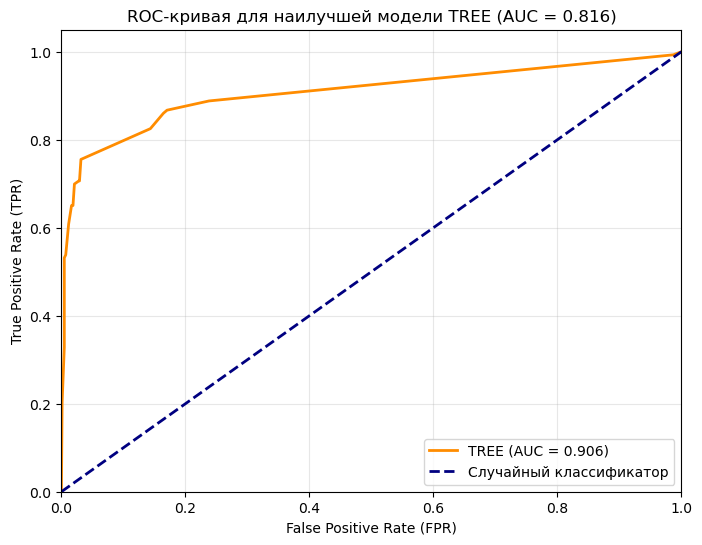

AUC для TREE: 0.906


In [102]:
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt

y_prob_tree = tree4.predict_proba(X_test_nPRoc)[:, 1]

fpr, tpr, _ = roc_curve(y_test_nPRoc, y_prob_tree)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'TREE (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', 
         label='Случайный классификатор')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC-кривая для наилучшей модели TREE (AUC = 0.816)')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

print(f"AUC для TREE: {roc_auc:.3f}")

Сравните между собой две лучшие модели:

1. Насколько сильно отличается качество предсказания на тестовых данных?
(Вычислите разность значений roc-auc.)

2. Постройте гистограммы важности признаков (для линейных моделей берите модуль значений весов) для каждой из этих моделей. Сравните между собой списки из трёх самых важных признаков. Совпадают ли они?

In [104]:
diff_auc = roc_tree3 - roc_svc2
print(f"Разность ROC-AUC (TREE - SVC): {diff_auc:.4f}")

Разность ROC-AUC (TREE - SVC): 0.0245


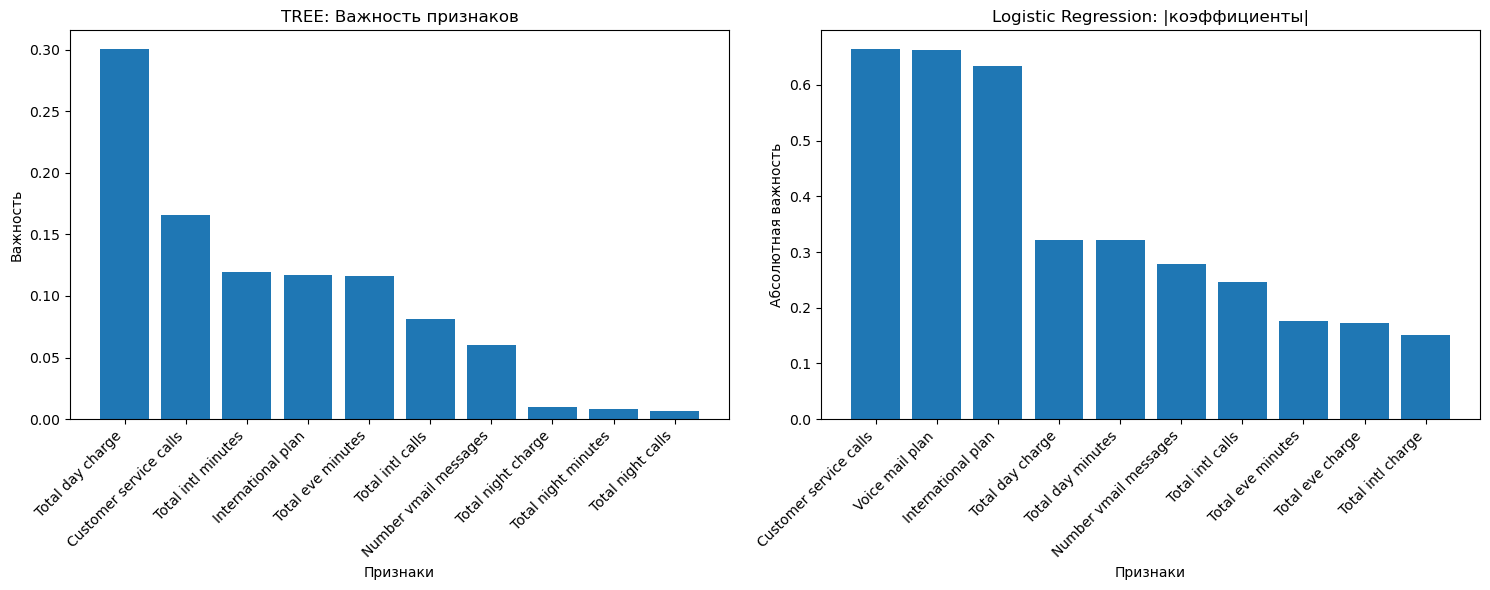

In [110]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Важность для TREE (feature_importances_)
importance_tree = tree4.feature_importances_
indices_tree = np.argsort(importance_tree)[::-1][:10]
ax1.bar(range(len(indices_tree)), importance_tree[indices_tree])
ax1.set_title('TREE: Важность признаков')
ax1.set_xlabel('Признаки')
ax1.set_ylabel('Важность')
ax1.set_xticks(range(len(indices_tree)))
ax1.set_xticklabels([X_train.columns[i] for i in indices_tree], rotation=45, ha='right')

# Важность для LR (абсолютные значения коэффициентов)
importance_lr = np.abs(lr3.coef_[0])
indices_lr = np.argsort(importance_lr)[::-1][:10]
ax2.bar(range(len(indices_lr)), importance_lr[indices_lr])
ax2.set_title('Logistic Regression: |коэффициенты|')
ax2.set_xlabel('Признаки')
ax2.set_ylabel('Абсолютная важность')
ax2.set_xticks(range(len(indices_lr)))
ax2.set_xticklabels([X_train.columns[i] for i in indices_lr], rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [112]:
top3_tree = [X_train.columns[i] for i in indices_tree[:3]]
top3_lr = [X_train.columns[i] for i in indices_lr[:3]]

print("\nТоп-3 признаков TREE:", top3_tree)
print("Топ-3 признаков LR:", top3_lr)
print("Совпадают:", set(top3_tree) == set(top3_lr))


Топ-3 признаков TREE: ['Total day charge', 'Customer service calls', 'Total intl minutes']
Топ-3 признаков LR: ['Customer service calls', 'Voice mail plan', 'International plan']
Совпадают: False


Сделайте выводы:

1. Являются ли данные сбалансированными? Что это означает?
    - целевой признак (target) несбалансирован, то есть количества объектов классов 0 и 1 различаются существенно.
      
    Модель может предсказывать почти всегда класс, которого больше.
  
2. Какая модель после подбора гиперпараметров лучше всего решает задачу с точки зрения метрики roc-auc?

    - Дерево, отметим, что оно и до подбора было лучшим

3. Одинаковые ли признаки важны для работы двух наилучших моделей? Почему?

    важны по-разному. важности признаков отличаются, потому что модели используют разные принципы обучения: линейные модели оценивают линейный вклад признака, а деревья — качество разбиений.